In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load the CSV data
# In benchmark.rs this was generated over the range:
#     let ncols = vec![100, 500];
#     let nrows = vec![1_000, 5_000, 10_000];
#
df = pd.read_csv("benchmark.csv")

# Strip whitespaces from column names
df.columns = df.columns.str.strip()

# Convert relevant fields to appropriate types
df['use_modular_encryption'] = df['use_modular_encryption'].astype(str)

# derived variables
df['data_size'] = df['nrow'] * df['ncol']
df['selected_pct'] = df['ncol_selected']/ df['ncol']

df

,nrow,ncol,ncol_selected,use_modular_encryption,object_store_name,duration_write (s),duration_read (s),data_size,selected_pct
0,1000,100,100,false,CryptFileSystem,0.253239,0.162061,100000,1.0
1,1000,100,10,false,CryptFileSystem,0.243467,0.156267,100000,0.1
2,1000,100,100,false,AndaCrypt,0.261462,0.232675,100000,1.0
3,1000,100,10,false,AndaCrypt,0.362052,0.301561,100000,0.1
4,1000,100,100,false,LocalFileSystem,0.098262,0.018396,100000,1.0
5,1000,100,10,false,LocalFileSystem,0.101973,0.012444,100000,0.1
6,1000,100,100,true,LocalFileSystem,0.103157,0.021524,100000,1.0
7,1000,100,10,true,LocalFileSystem,0.104525,0.013182,100000,0.1
8,5000,100,100,false,CryptFileSystem,0.759116,0.467900,500000,1.0
9,5000,100,10,false,CryptFileSystem,0.760743,0.441368,500000,0.1


In [2]:
# Melt the dataframe to long format for easier plotting
df_melted = df.melt(
    id_vars=[
        'use_modular_encryption', 'object_store_name', 'selected_pct', 'data_size'],
    value_vars=['duration_write (s)', 'duration_read (s)'],
    var_name='operation',
    value_name='duration (s)'
)

# Combine encryption and object store info for grouping
df_melted['config'] = (
    'enc=' + df_melted['use_modular_encryption'].astype(str) +
    ', store=' + df_melted['object_store_name'] +
    ', selected_pct=' + df_melted['selected_pct'].astype(str)
)

df_melted


,use_modular_encryption,object_store_name,selected_pct,data_size,operation,duration (s),config
0,false,CryptFileSystem,1.0,100000,duration_write (s),0.253239,"enc= false, store= CryptFileSystem, selected_p..."
1,false,CryptFileSystem,0.1,100000,duration_write (s),0.243467,"enc= false, store= CryptFileSystem, selected_p..."
2,false,AndaCrypt,1.0,100000,duration_write (s),0.261462,"enc= false, store= AndaCrypt, selected_pct=1.0"
3,false,AndaCrypt,0.1,100000,duration_write (s),0.362052,"enc= false, store= AndaCrypt, selected_pct=0.1"
4,false,LocalFileSystem,1.0,100000,duration_write (s),0.098262,"enc= false, store= LocalFileSystem, selected_p..."
...,...,...,...,...,...,...,...
91,false,AndaCrypt,0.1,5000000,duration_read (s),0.707877,"enc= false, store= AndaCrypt, selected_pct=0.1"
92,false,LocalFileSystem,1.0,5000000,duration_read (s),0.334932,"enc= false, store= LocalFileSystem, selected_p..."
93,false,LocalFileSystem,0.1,5000000,duration_read (s),0.063104,"enc= false, store= LocalFileSystem, selected_p..."
94,true,LocalFileSystem,1.0,5000000,duration_read (s),0.353912,"enc= true, store= LocalFileSystem, selected_pc..."


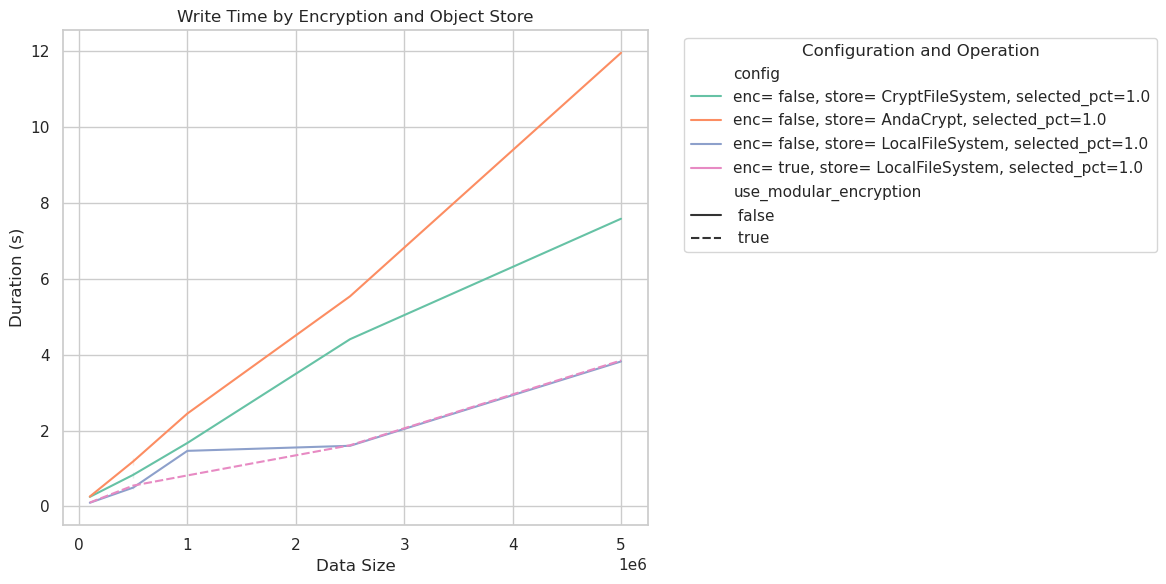

In [3]:

# Plotting
plt.figure(figsize=(12, 6))
df_selected = df_melted[(df_melted['operation'] == 'duration_write (s)') & (df_melted['selected_pct'] == 1.0)]
palette = sns.color_palette("Set2", 4)
sns.lineplot(
    data=df_selected,
    x='data_size',
    y='duration (s)',
    hue='config',
    style='use_modular_encryption',
    markers=False,
    dashes=True,
    palette = palette
)

# Plot decorations
plt.title("Write Time by Encryption and Object Store")
plt.xlabel("Data Size")
plt.ylabel("Duration (s)")
plt.legend(title="Configuration and Operation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


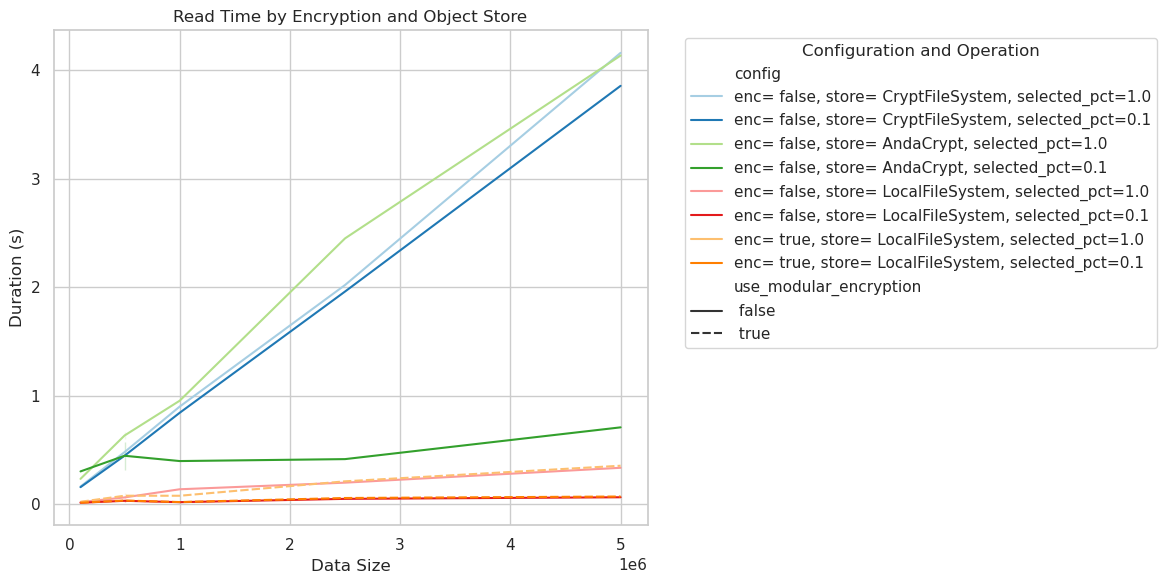

In [4]:
# Plotting
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Paired", 8)
sns.lineplot(
    data=df_melted[df_melted['operation'] == 'duration_read (s)'],
    x='data_size',
    y='duration (s)',
    hue='config',
    style='use_modular_encryption',
    markers=False,
    dashes=True,
    palette = palette
)

# Plot decorations
plt.title("Read Time by Encryption and Object Store")
plt.xlabel("Data Size")
plt.ylabel("Duration (s)")
plt.legend(title="Configuration and Operation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()